# The Data
The raw data comes in the form of three folders, intended for a train-test-val split, each containing two subfolders that sort the constituent images by class.  To make this explicit, the structure is:<br>
Data<br>
|<br>
|test<br>
||NORMAL<br>
||PNEUMONIA<br>
|<br>
|train<br>
||NORMAL<br>
||PNEUMONIA<br>
|<br>
|val<br>
||NORMAL<br>
||PNEUMONIA<br>

## Initial Imports

In [38]:
%load_ext autoreload
%autoreload 2
import os
import viz_package
import PIL.Image as pim
from tensorflow.keras import models
from tensorflow.keras import layers
from skimage.color import rgb2gray
from skimage.color import gray2rgb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We define our images using the process_and_split method from the viz_package

In [8]:
images,labels,X_train,y_train,X_test,y_test,X_val,y_val=viz_package.process_and_split_data()

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


It will also be convenient to have these imported as a dataframe:

In [28]:
norm_fns=[os.path.join(r'train\NORMAL',s) for s in os.listdir(r'train\NORMAL')
         ]+[os.path.join(r'test\NORMAL',s) for s in os.listdir(r'test\NORMAL')
           ]+[os.path.join(r'val\NORMAL',s) for s in os.listdir(r'val\NORMAL')]
#Find the filenames of all normal images, then do the same for all pneumonia images
pneu_fns=[os.path.join(r'train\PNEUMONIA',s) for s in os.listdir(r'train\PNEUMONIA')
         ]+[os.path.join(r'test\PNEUMONIA',s) for s in os.listdir(r'test\PNEUMONIA')
           ]+[os.path.join(r'val\PNEUMONIA',s) for s in os.listdir(r'val\PNEUMONIA')]
img_det_df=pd.DataFrame([(list(pim.open(fn).size)+[0]) for fn in norm_fns if fn.endswith('jpeg')]+[(list(pim.open(fn).size)+[1]) for fn in pneu_fns if fn.endswith('jpeg')]
    ,columns=['W','H','P'])
#Put all of those images, located by filename and opened with PIL.  We check the filetype in a brittle way to try to avoid the .ds_store file that will occur in transferring the folders back and forth


# Visualizing aspect ratios, image sizes, and data distribution.

We want to get a sense of how are images are distributed and what their sizes are.   We plot the width of each image on the x-axis, height on the y-axis.  We see them both overlayed and separated by pneumonia status, in case some pattern does appear (which does seem the case, but only slightly and so the difference was worked around around rather than exploited). 

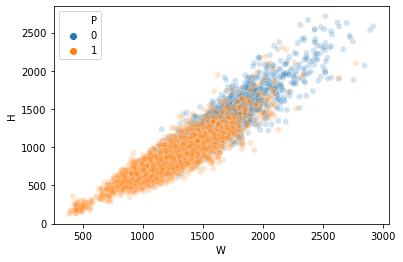

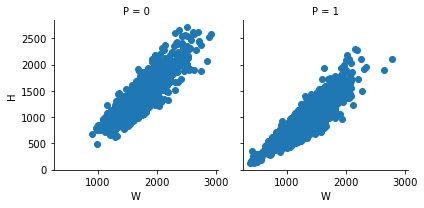

In [36]:
sns.scatterplot(x='W',y='H',hue='P',data=img_det_df,alpha=.2);
plt.show();
plt.close();
g=sns.FacetGrid(img_det_df,col='P');
g.map(plt.scatter,'W','H');

Still just trying to get a feel for variability, we plot a collection of overlain histograms, each triplet representing the distribution of brightness for three randomly chosen images in each grid entry.

We can try to build a sense of the way that the mean brightness varies based on patient status using the overlap_images method as part of the included visualization package.

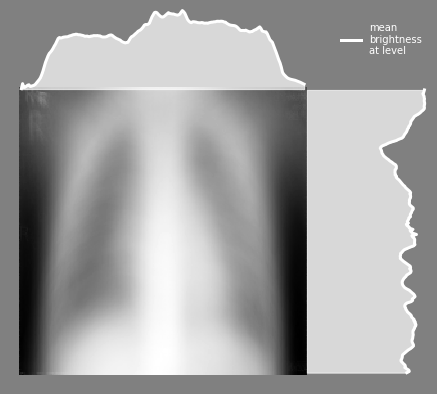

In [60]:
pneu=images[labels==1][:,:,:,0]
#Define the pneumonia x-rays by selecting those images with a corresponding label of 1
r=viz_package.overlap_images(pneu)
r
#The result is called here so it can be seen in the jupyter notebook

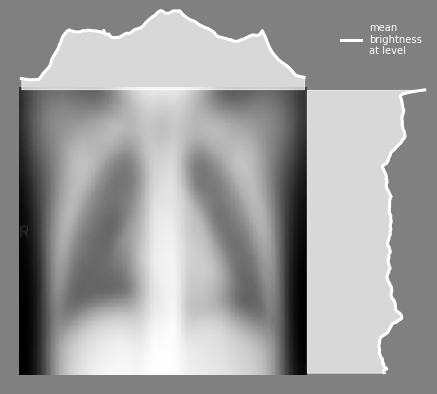

In [61]:
norm=images[labels==0][:,:,:,0]
#Define the normal x-rays by selecting those images with a corresponding label of 0
r=viz_package.overlap_images(norm)
r
#The result is called here so it can be seen in the jupyter notebook

We can do a slightly different procedure to get a sense of the image similarity in another way, by looking at the average mean difference between pixels at the same (x,y) coordinates across the pneumonia and normal image sets.  The primary takeaway from this is that we can see there is actually a fairly good centering of the images across the image sets, regardless of patient status, evidenced by the clearly cutting out of what we know should be in common, namely the ribs.  

We use the same pneu and norm definitions as above

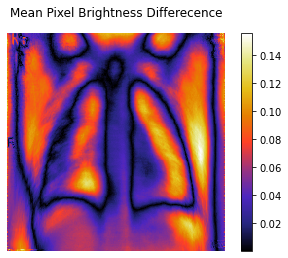

In [69]:
fig,ax=plt.subplots()
r=ax.matshow(abs(pneu.mean(axis=0)-norm.mean(axis=0)),cmap='CMRmap');
#Notice we slice along the 0 axis, which is that along which the images are arranged.  
plt.axis('off');
plt.title('Mean Pixel Brightness Differecence')
fig.colorbar(r);